In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.model_selection import train_test_split

In [39]:
X,y = make_classification(1000,n_features=2,n_informative=2,n_redundant=0,random_state=4)

In [40]:
# X

In [41]:
# y

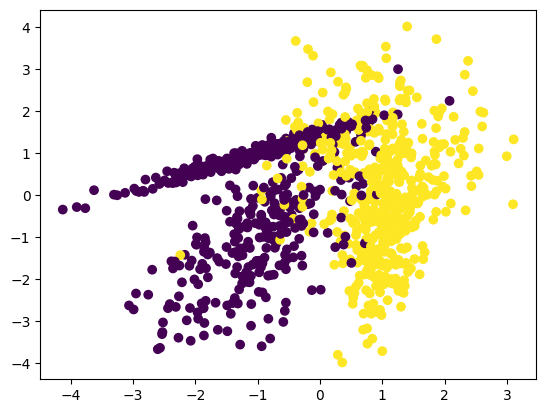

In [42]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

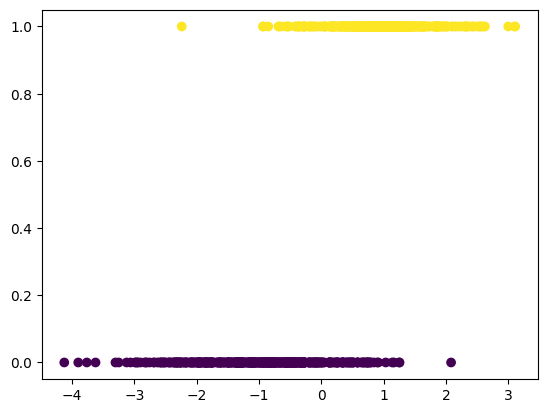

In [44]:
plt.scatter(X[:,0],y,c = y)
plt.show()

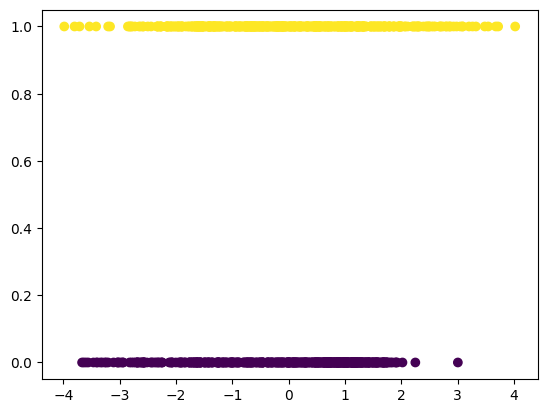

In [45]:
plt.scatter(X[:,1],y,c = y)
plt.show()

In [62]:
class LogisticRegression:
    def __init__(self,lr = 0.01,epochs = 100):
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        self.w,self.w0 = self.gradientDescent(X,y,self.lr,self.epochs)

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
        
    def hypothesis(self,X,w,w0):
        return self.sigmoid(w@X.T + w0)

    def loss(self,X,w,w0,y):
        ypred = self.hypothesis(X,w,w0)
        return -np.sum(y*np.log2(ypred) + (1-y)*np.log2(1-ypred))

    def gradientDescent(self,X,y,lr=0.01,epochs = 100):
        w0 = 0
        w = np.ones(shape=(X.shape[1],))
        self.loss_e = []
    
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            self.loss_e.append(self.loss(X,w,w0,y))
            grad = np.mean((ypred-y)*X.T,axis = 1)
            w = w-lr*grad
            w0 = w0-lr*np.mean(ypred-y)
            
        return w,w0

    def predict(self,X):
        ypred = self.hypothesis(X,self.w,self.w0)
        ypred[ypred <= 0.5] = 0
        ypred[ypred > 0.5] = 1
        return ypred

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [88]:
clf = LogisticRegression(lr = 0.01,epochs=1000)
clf.fit(x_train,y_train)

In [89]:
ypred = clf.predict(x_test)
print(f"Accuracy: {np.mean(ypred == y_test)}")

Accuracy: 0.885


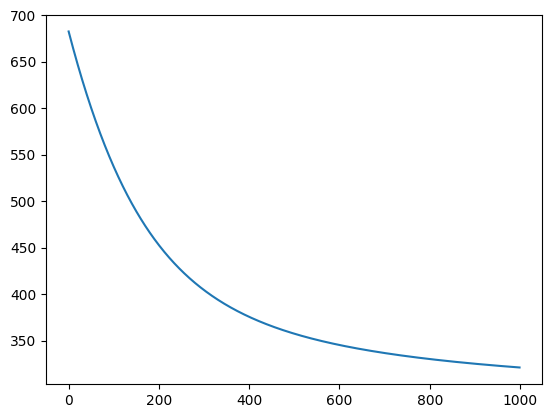

In [90]:
plt.plot(clf.loss_e)
plt.show()

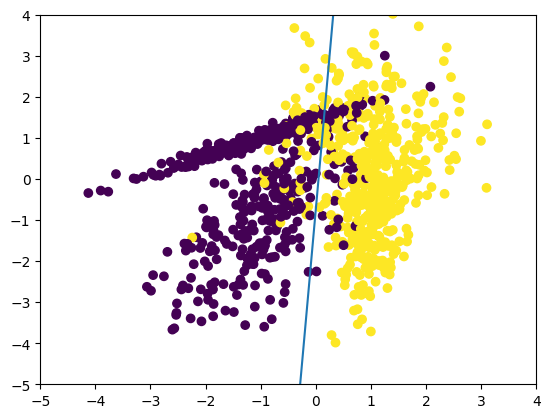

In [91]:
x1 = np.linspace(-4,3,100)
x2 = -(clf.w0 + clf.w[0]*x1)/clf.w[1]
plt.scatter(X[:,0],X[:,1],c = y)
plt.ylim(-5,4)
plt.xlim(-5,4)
plt.plot(x1,x2)
plt.show()